# Final Project (02/25/2023)
## Credit card fraud detection - track 1-
name: Kohsuke Uchimura

# Business problem
Nowadays, online payments using credit card and debit card are common payment method. Simultaneously, online fraud has been increasing using online transaction.
As a data scientist, I asked credit company to build model to identify frauds in transaction using Machine Learning. The objective is identify whether one transaction is fraud or not from transaction features and provide better solution to prevent fraud. 

# Dataset
Dataset is downloaded from Kaggle.


<a href = https://www.kaggle.com/datasets/ealaxi/paysim1> Synthetic Financial Datasets For Fraud Detection </a>

# Description
 Dataset contains these 11 columns,
<ul>
    <li> step: Maps a unit of time in the real world. In this case 1 step is 1 hour of time. </li>
    <li> type: Type of transaction (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER). </li>
    <li> amount: amount of the transaction in local currency. </li>
    <li> nameOrig: customer who started the transaction. </li>
    <li> oldbalanceOrg(Orig): initial balance before the transaction. </li>
    <li> newbalanceOrig: customer's balance after the transaction. </li>
    <li> nameDest: recipient ID of the transaction. </li>
    <li> oldbalanceDest: initial recipient balance before the transaction. </li>
    <li> newbalanceDest: recipient's balance after the transaction. </li>
    <li> isFraud: identifies a fraudulent transaction (1) and non fraudulent (0)</li>
 </ul>
 
※ C, M in ID represents Coustomer or Merchant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
transaction = pd.read_csv("./datasets/transaction_log.csv")
transaction.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
transaction.shape

(6362620, 11)

In [4]:
transaction["step"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [5]:
transaction["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [6]:
transaction.rename(columns = {"oldbalanceOrg":"oldbalanceOrig"},inplace = True)
transaction.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [7]:
transaction.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Change unit of amount of money to thousand $. 

In [8]:
transaction[["amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest"]] = transaction[["amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest"]]/1000
transaction[["amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest"]].head()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9.83964,170.136,160.29636,0.000,0.0
1,1.86428,21.249,19.38472,0.000,0.0
2,0.18100,0.181,0.00000,0.000,0.0
3,0.18100,0.181,0.00000,21.182,0.0
4,11.66814,41.554,29.88586,0.000,0.0


In [9]:
transaction.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+02,8.338831e+02,8.551137e+02,1.100702e+03,1.224996e+03,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+02,2.888243e+03,2.924049e+03,3.399180e+03,3.674129e+03,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+01,1.420800e+01,0.000000e+00,1.327057e+02,2.146614e+02,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+02,1.073152e+02,1.442584e+02,9.430367e+02,1.111909e+03,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+04,5.958504e+04,4.958504e+04,3.560159e+05,3.561793e+05,1.000000e+00,1.000000e+00


In [10]:
transaction[transaction["amount"] == transaction["amount"].max()]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445.51664,C1715283297,0.0,0.0,C439737079,9.59598,92455.11262,0,0


In [11]:
transaction["nameOrig"].str.contains("C").sum()

6362620

In [12]:
transaction["nameDest"].str.contains("C").sum()

4211125

In [13]:
transaction["nameDest"].str.contains("M").sum()

2151495

In [14]:
"M" in transaction.iloc[0]["nameDest"]

True

In [15]:
transaction.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9.83964,C1231006815,170.136,160.29636,M1979787155,0.000,0.0,0,0
1,1,PAYMENT,1.86428,C1666544295,21.249,19.38472,M2044282225,0.000,0.0,0,0
2,1,TRANSFER,0.18100,C1305486145,0.181,0.00000,C553264065,0.000,0.0,1,0
3,1,CASH_OUT,0.18100,C840083671,0.181,0.00000,C38997010,21.182,0.0,1,0
4,1,PAYMENT,11.66814,C2048537720,41.554,29.88586,M1230701703,0.000,0.0,0,0


In [16]:
transaction[transaction["nameDest"].str.contains("C")  & transaction["isFraud"] == 1]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,0.18100,C1305486145,0.18100,0.0,C553264065,0.00000,0.00000,1,0
3,1,CASH_OUT,0.18100,C840083671,0.18100,0.0,C38997010,21.18200,0.00000,1,0
251,1,TRANSFER,2.80600,C1420196421,2.80600,0.0,C972765878,0.00000,0.00000,1,0
252,1,CASH_OUT,2.80600,C2101527076,2.80600,0.0,C1007251739,26.20200,0.00000,1,0
680,1,TRANSFER,20.12800,C137533655,20.12800,0.0,C1848415041,0.00000,0.00000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339.68213,C786484425,339.68213,0.0,C776919290,0.00000,339.68213,1,0
6362616,743,TRANSFER,6311.40928,C1529008245,6311.40928,0.0,C1881841831,0.00000,0.00000,1,0
6362617,743,CASH_OUT,6311.40928,C1162922333,6311.40928,0.0,C1365125890,68.48884,6379.89811,1,0
6362618,743,TRANSFER,850.00252,C1685995037,850.00252,0.0,C2080388513,0.00000,0.00000,1,0


In [17]:
transaction[transaction["nameDest"].str.contains("M") & transaction["isFraud"] == 1]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


"nameDest" ,that is ID, starting with "C" is one of the key of identifying fraud . So classify ID type. C = 1, M = 0.

In [18]:
transaction["id_type"] = 0

In [19]:
transaction["id_type"] = transaction["id_type"].where(transaction["nameDest"].str.contains("M"),1)
transaction.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,id_type
0,1,PAYMENT,9.83964,C1231006815,170.136,160.29636,M1979787155,0.000,0.0,0,0,0
1,1,PAYMENT,1.86428,C1666544295,21.249,19.38472,M2044282225,0.000,0.0,0,0,0
2,1,TRANSFER,0.18100,C1305486145,0.181,0.00000,C553264065,0.000,0.0,1,0,1
3,1,CASH_OUT,0.18100,C840083671,0.181,0.00000,C38997010,21.182,0.0,1,0,1
4,1,PAYMENT,11.66814,C2048537720,41.554,29.88586,M1230701703,0.000,0.0,0,0,0


In [20]:
transaction.groupby("type").max()["isFraud"] 

type
CASH_IN     0
CASH_OUT    1
DEBIT       0
PAYMENT     0
TRANSFER    1
Name: isFraud, dtype: int64

Only cash_out, transfer has a possiblity of fraud.

In [21]:
transaction.groupby(["type","id_type","isFraud"]).count()

step   amount  nameOrig  oldbalanceOrig  \
type     id_type isFraud                                               
CASH_IN  1       0        1399284  1399284   1399284         1399284   
CASH_OUT 1       0        2233384  2233384   2233384         2233384   
                 1           4116     4116      4116            4116   
DEBIT    1       0          41432    41432     41432           41432   
PAYMENT  0       0        2151495  2151495   2151495         2151495   
TRANSFER 1       0         528812   528812    528812          528812   
                 1           4097     4097      4097            4097   

                          newbalanceOrig  nameDest  oldbalanceDest  \
type     id_type isFraud                                             
CASH_IN  1       0               1399284   1399284         1399284   
CASH_OUT 1       0               2233384   2233384         2233384   
                 1                  4116      4116            4116   
DEBIT    1       0                 41432     41432           41432   
PAYMENT  0       0               2151495   2151495         2151495   
TRANSFER 1       0                528812    528812          528812   
                 1                  4097      4097            4097   

                          newbalanceDest  isFlaggedFraud  
type     id_type isFraud                                  
CASH_IN  1       0               1399284         1399284  
CASH_OUT 1       0               2233384         2233384  
                 1                  4116            4116  
DEBIT    1       0                 41432           41432  
PAYMENT  0       0               2151495         2151495  
TRANSFER 1       0                528812          528812  
                 1                  4097            4097

<li> Cash out and id_type = 1 --- 4116 was fraud. </li>
<li> Transfer and id_type = 1 --- 4097 was fraud. </li>

In [22]:
detect = transaction[(transaction["type"] == "CASH_OUT") | (transaction["type"] == "TRANSFER") & transaction["id_type"] == 1].reset_index(drop = True)
detect.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,id_type
0,1,TRANSFER,0.18100,C1305486145,0.181,0.0,C553264065,0.000,0.00000,1,0,1
1,1,CASH_OUT,0.18100,C840083671,0.181,0.0,C38997010,21.182,0.00000,1,0,1
2,1,CASH_OUT,229.13394,C905080434,15.325,0.0,C476402209,5.083,51.51344,0,0,1
3,1,TRANSFER,215.31030,C1670993182,0.705,0.0,C1100439041,22.425,0.00000,0,0,1
4,1,TRANSFER,311.68589,C1984094095,10.835,0.0,C932583850,6.267,2719.17289,0,0,1


In [23]:
detect = detect.reindex(columns = ["step","type","amount","nameOrig","oldbalanceOrig","newbalanceOrig","nameDest","oldbalanceDest","newbalanceDest","id_type","isFraud","isFlaggedFraud"])
detect.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,id_type,isFraud,isFlaggedFraud
0,1,TRANSFER,0.18100,C1305486145,0.181,0.0,C553264065,0.000,0.00000,1,1,0
1,1,CASH_OUT,0.18100,C840083671,0.181,0.0,C38997010,21.182,0.00000,1,1,0
2,1,CASH_OUT,229.13394,C905080434,15.325,0.0,C476402209,5.083,51.51344,1,0,0
3,1,TRANSFER,215.31030,C1670993182,0.705,0.0,C1100439041,22.425,0.00000,1,0,0
4,1,TRANSFER,311.68589,C1984094095,10.835,0.0,C932583850,6.267,2719.17289,1,0,0


In [24]:
detect.rename(columns = {"amount": "amount(1000$)"}, inplace = True)
detect.head()

,step,type,amount(1000$),nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,id_type,isFraud,isFlaggedFraud
0,1,TRANSFER,0.18100,C1305486145,0.181,0.0,C553264065,0.000,0.00000,1,1,0
1,1,CASH_OUT,0.18100,C840083671,0.181,0.0,C38997010,21.182,0.00000,1,1,0
2,1,CASH_OUT,229.13394,C905080434,15.325,0.0,C476402209,5.083,51.51344,1,0,0
3,1,TRANSFER,215.31030,C1670993182,0.705,0.0,C1100439041,22.425,0.00000,1,0,0
4,1,TRANSFER,311.68589,C1984094095,10.835,0.0,C932583850,6.267,2719.17289,1,0,0


In [25]:
detect.shape

(2770409, 12)

table "detect" has only columns of type = "TRANSER", "CASH_OUT" and "id_type" = 1


# Feature selection
Next, choose features using model.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
detect.head()

,step,type,amount(1000$),nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,id_type,isFraud,isFlaggedFraud
0,1,TRANSFER,0.18100,C1305486145,0.181,0.0,C553264065,0.000,0.00000,1,1,0
1,1,CASH_OUT,0.18100,C840083671,0.181,0.0,C38997010,21.182,0.00000,1,1,0
2,1,CASH_OUT,229.13394,C905080434,15.325,0.0,C476402209,5.083,51.51344,1,0,0
3,1,TRANSFER,215.31030,C1670993182,0.705,0.0,C1100439041,22.425,0.00000,1,0,0
4,1,TRANSFER,311.68589,C1984094095,10.835,0.0,C932583850,6.267,2719.17289,1,0,0


In [28]:
detection = detect[["step","type","amount(1000$)","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]]
detection.head()

,step,type,amount(1000$),oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,0.18100,0.181,0.0,0.000,0.00000,1
1,1,CASH_OUT,0.18100,0.181,0.0,21.182,0.00000,1
2,1,CASH_OUT,229.13394,15.325,0.0,5.083,51.51344,0
3,1,TRANSFER,215.31030,0.705,0.0,22.425,0.00000,0
4,1,TRANSFER,311.68589,10.835,0.0,6.267,2719.17289,0


In [29]:
dummies = pd.get_dummies(detection.type)
dummies.head()

,CASH_OUT,TRANSFER
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [30]:
detection = pd.concat([detection,dummies],axis = 1)
detection.head()

,step,type,amount(1000$),oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER
0,1,TRANSFER,0.18100,0.181,0.0,0.000,0.00000,1,0,1
1,1,CASH_OUT,0.18100,0.181,0.0,21.182,0.00000,1,1,0
2,1,CASH_OUT,229.13394,15.325,0.0,5.083,51.51344,0,1,0
3,1,TRANSFER,215.31030,0.705,0.0,22.425,0.00000,0,0,1
4,1,TRANSFER,311.68589,10.835,0.0,6.267,2719.17289,0,0,1


In [31]:
detection = detection.reindex(columns = ["step","type","amount(1000$)","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest","CASH_OUT","TRANSFER","isFraud"])
detection.head()

,step,type,amount(1000$),oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,TRANSFER,isFraud
0,1,TRANSFER,0.18100,0.181,0.0,0.000,0.00000,0,1,1
1,1,CASH_OUT,0.18100,0.181,0.0,21.182,0.00000,1,0,1
2,1,CASH_OUT,229.13394,15.325,0.0,5.083,51.51344,1,0,0
3,1,TRANSFER,215.31030,0.705,0.0,22.425,0.00000,0,1,0
4,1,TRANSFER,311.68589,10.835,0.0,6.267,2719.17289,0,1,0


Successfuly get dummies of type, so don't need type columns.

In [32]:
detection.drop("type",axis = 1,inplace = True)
detection.head()

,step,amount(1000$),oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,TRANSFER,isFraud
0,1,0.18100,0.181,0.0,0.000,0.00000,0,1,1
1,1,0.18100,0.181,0.0,21.182,0.00000,1,0,1
2,1,229.13394,15.325,0.0,5.083,51.51344,1,0,0
3,1,215.31030,0.705,0.0,22.425,0.00000,0,1,0
4,1,311.68589,10.835,0.0,6.267,2719.17289,0,1,0


<AxesSubplot: >

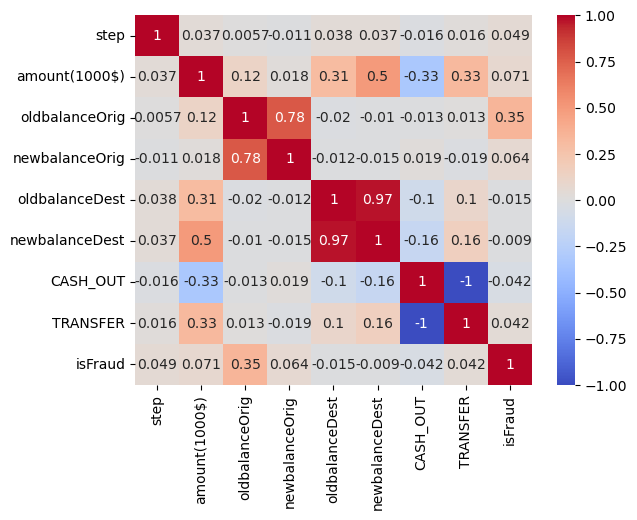

In [33]:
sns.heatmap(detection.corr(),annot = True,cmap = "coolwarm")

newbalanceOrig - oldbalanceOrig and newbalanceDest - oldbalanceDest have multicorlinearity. 

For model1, try just removing one of the features of multicollinearity having less correlation with "isFraud".

In [34]:
table1_for_model = detection[["step","amount(1000$)","oldbalanceOrig","oldbalanceDest","CASH_OUT","TRANSFER","isFraud"]]
table1_for_model.head()

,step,amount(1000$),oldbalanceOrig,oldbalanceDest,CASH_OUT,TRANSFER,isFraud
0,1,0.18100,0.181,0.000,0,1,1
1,1,0.18100,0.181,21.182,1,0,1
2,1,229.13394,15.325,5.083,1,0,0
3,1,215.31030,0.705,22.425,0,1,0
4,1,311.68589,10.835,6.267,0,1,0


Removed "newbalanceOrig","newbalanceDest" from features.

<AxesSubplot: >

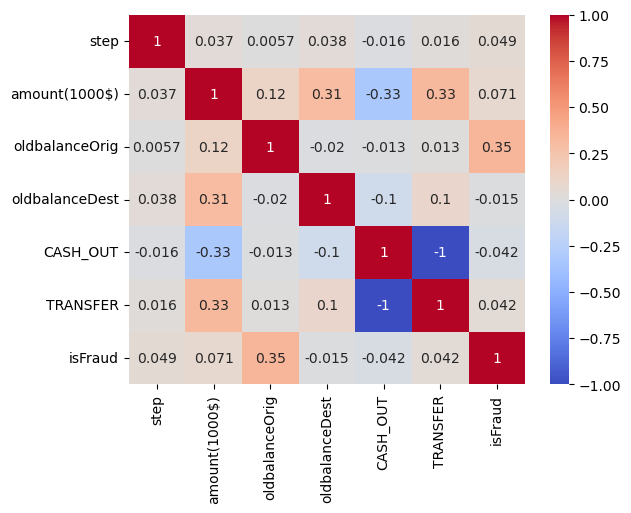

In [35]:
sns.heatmap(table1_for_model.corr(), annot = True, cmap = "coolwarm")

In [36]:
table1_for_model.shape

(2770409, 7)

## Model inplemention




In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
X = table1_for_model[["step","amount(1000$)","oldbalanceOrig","oldbalanceDest","CASH_OUT","TRANSFER"]]
y = table1_for_model["isFraud"]

In [39]:
X

,step,amount(1000$),oldbalanceOrig,oldbalanceDest,CASH_OUT,TRANSFER
0,1,0.18100,0.18100,0.00000,0,1
1,1,0.18100,0.18100,21.18200,1,0
2,1,229.13394,15.32500,5.08300,1,0
3,1,215.31030,0.70500,22.42500,0,1
4,1,311.68589,10.83500,6.26700,0,1
...,...,...,...,...,...,...
2770404,743,339.68213,339.68213,0.00000,1,0
2770405,743,6311.40928,6311.40928,0.00000,0,1
2770406,743,6311.40928,6311.40928,68.48884,1,0
2770407,743,850.00252,850.00252,0.00000,0,1


In [40]:
y

0          1
1          1
2          0
3          0
4          0
          ..
2770404    1
2770405    1
2770406    1
2770407    1
2770408    1
Name: isFraud, Length: 2770409, dtype: int64

In [41]:
sum(y == 1)

8213

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [43]:
sum(y_test == 1)

2497

In [44]:
model1 = LogisticRegression(random_state = 24)

In [45]:
model1.fit(X_train, y_train)

LogisticRegression(random_state=24)

In [46]:
y_pred = model1.predict(X_test)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9975515056134893

In [49]:
metrics.confusion_matrix(y_test, y_pred)

array([[828493,    133],
       [  1902,    595]])

In [50]:
model1.coef_

array([[ 5.70495229e-03,  1.16330615e-05,  3.10918631e-03,
        -4.57909632e-04, -3.26702018e+00, -1.71875269e+00]])

In [51]:
model1.intercept_

array([-4.98809535])

In [52]:
metrics.f1_score(y_test, y_pred)

0.36899224806201547

In [53]:
print( metrics.classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828626
           1       0.82      0.24      0.37      2497

    accuracy                           1.00    831123
   macro avg       0.91      0.62      0.68    831123
weighted avg       1.00      1.00      1.00    831123



Recall score was low, which means there are many actual frauds predicted not fraud.

So, let's try to increase recall score.

Try to use both L1 and L2 regularization.

In [54]:
model2 = LogisticRegression(penalty = "elasticnet", solver = "saga", l1_ratio = 0.8, random_state = 24)

In [55]:
model2.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.8, penalty='elasticnet', random_state=24,
                   solver='saga')

In [56]:
y_pred = model2.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
metrics.accuracy_score(y_test, y_pred)

0.9942234783539862

In [59]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828626
           1       0.01      0.01      0.01      2497

    accuracy                           0.99    831123
   macro avg       0.50      0.50      0.50    831123
weighted avg       0.99      0.99      0.99    831123



It became warse. I have to choose other models ?

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
model3 = DecisionTreeClassifier(criterion = "entropy", max_depth = 16,random_state = 24)

In [109]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=24)

In [110]:
y_tree_pred = model3.predict(X_test)

In [111]:
metrics.accuracy_score(y_test,y_tree_pred)

0.9986452065458422

In [112]:
metrics.confusion_matrix(y_test, y_tree_pred, labels = (0,1))

array([[828244,    382],
       [   744,   1753]])

In [113]:
print(metrics.classification_report(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828626
           1       0.82      0.70      0.76      2497

    accuracy                           1.00    831123
   macro avg       0.91      0.85      0.88    831123
weighted avg       1.00      1.00      1.00    831123



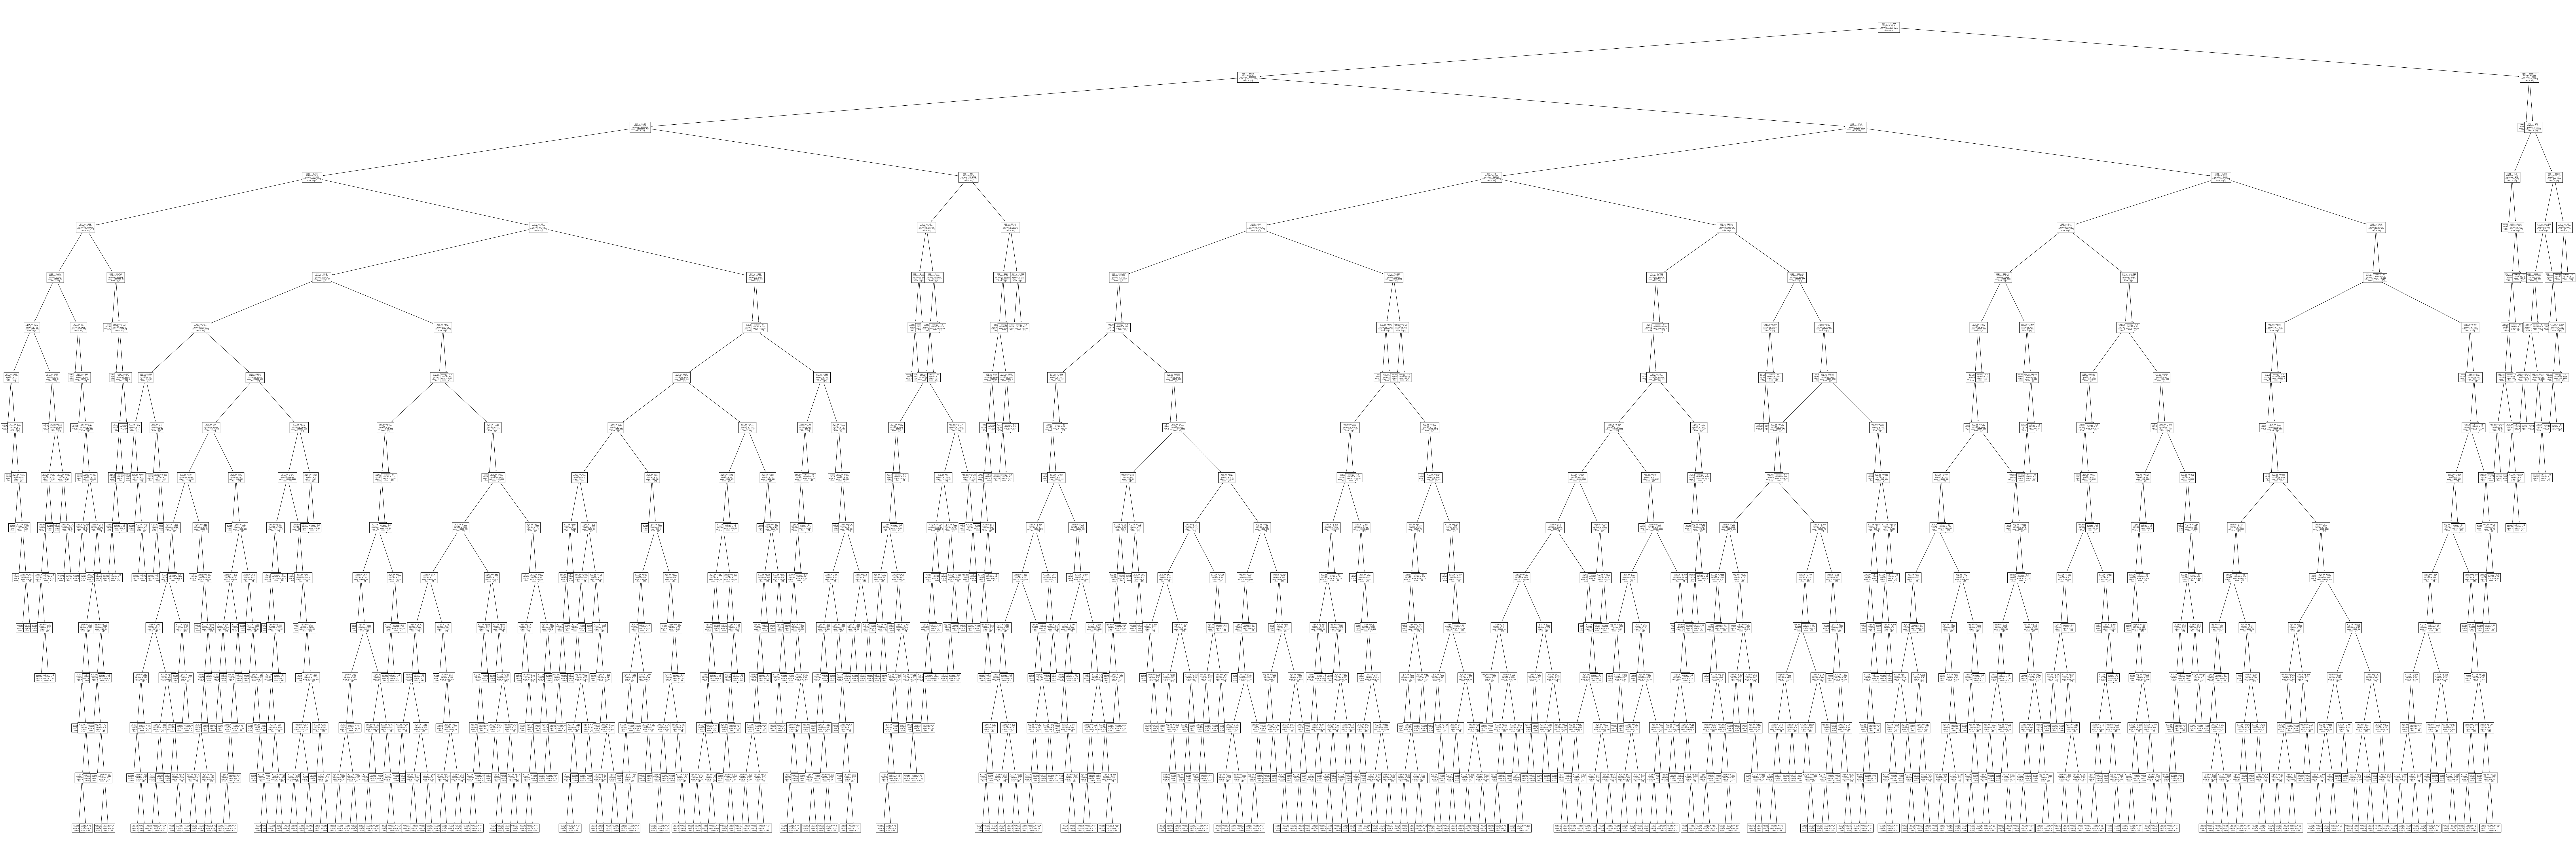

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.tree as tree
plt.figure(figsize = (150,50))
tree.plot_tree(model3, class_names = True, filled = False, fontsize = 5)
plt.show()
#fig.savefig("/Users/akosuke/Downloads".dpi = 300 )

Try ranfom forest for more accuracy.

In [144]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators = 15, criterion = "entropy", max_depth = 16, random_state = 24)
model4.fit(X_train, y_train)
y_forest_pred = model4.predict(X_test)

In [145]:
metrics.accuracy_score(y_test, y_forest_pred)

0.9987907926985536

In [146]:
metrics.confusion_matrix(y_test, y_forest_pred, labels = (0,1))

array([[828546,     80],
       [   925,   1572]])

In [147]:
print(metrics.classification_report(y_test, y_forest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828626
           1       0.95      0.63      0.76      2497

    accuracy                           1.00    831123
   macro avg       0.98      0.81      0.88    831123
weighted avg       1.00      1.00      1.00    831123



By deploying random forest, it increase precision, but decrease recall, then f1_score didn't change. 
in this case, I want to avoid the case negative false because the cost that the one predicted not fraud was actually fraud is high.


For this reason, I inplement decision tree model for this bussiness case.